In [41]:
import pandas as pd
import json
import geopandas as gpd
import os
%matplotlib inline
import geopandas as gp
import pandas as pd
import math
from shapely.geometry import MultiLineString
from shapely.geometry import MultiPoint
import numpy as np
from shapely import geometry
from shapely.geometry import Point, Polygon, box,LineString
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon
from numpy import cos,sin,arccos
import numpy as np
from pylab import *
from shapely.ops import cascaded_union
from shapely.geometry import Point, LineString, mapping
import scipy.interpolate
import time
import cudf
import cugraph

In [28]:
traffic_flow = gpd.read_file("traffic_flow_shp/traffic_flow_26082020/traffic_flow_26082020_2100_2200.shp")
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry
0,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,-,0.71360,2,70.00,70.00,70.0,0.00000,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74195 3.08229, 101.74197 3.082..."
1,5803,Jalan Cheras Hartamas,-,0.11864,2,70.00,70.00,70.0,0.00000,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74658 3.07899, 101.74688 3.078..."
2,5804,Jalan Medan Masria,-,1.14547,2,85.00,85.00,90.0,0.81481,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74763 3.07880, 101.74779 3.078..."
3,5803,Jalan Cheras Hartamas,+,0.71240,2,71.00,71.00,84.2,2.29928,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74829 3.07853, 101.74802 3.078..."
4,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,+,0.82177,2,59.37,59.37,67.6,1.78578,0.71,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74715 3.07869, 101.74685 3.078..."


In [29]:
traffic_flow.dtypes

TMC_PC         int64
TMC_DE        object
TMC_QD        object
TMC_LE       float64
FC             int64
CF_SP        float64
CF_SU        float64
CF_FF        float64
CF_JF        float64
CF_CN        float64
PBT           object
DE            object
geometry    geometry
dtype: object

In [30]:
traffic_flow['endpoints'] = traffic_flow['geometry'].apply(lambda x: x.boundary)



In [31]:
def return_start_point(x):
    #print(x)
    try:
        return x.boundary[0]
    except:
        return None

def return_end_point(x):
    try:
        return x.boundary[1]
    except:
        return None
    

traffic_flow['start_point'] = traffic_flow['geometry'].apply(lambda x: return_start_point(x))
traffic_flow['end_point'] = traffic_flow['geometry'].apply(lambda x: return_end_point(x))

In [32]:
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry,endpoints,start_point,end_point
0,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,-,0.71360,2,70.00,70.00,70.0,0.00000,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74195 3.08229, 101.74197 3.082...","MULTIPOINT (101.74195 3.08229, 101.74658 3.07899)",POINT (101.74195 3.08229),POINT (101.74658 3.07899)
1,5803,Jalan Cheras Hartamas,-,0.11864,2,70.00,70.00,70.0,0.00000,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74658 3.07899, 101.74688 3.078...","MULTIPOINT (101.74658 3.07899, 101.74763 3.07880)",POINT (101.74658 3.07899),POINT (101.74763 3.07880)
2,5804,Jalan Medan Masria,-,1.14547,2,85.00,85.00,90.0,0.81481,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74763 3.07880, 101.74779 3.078...","MULTIPOINT (101.74763 3.07880, 101.74830 3.07868)",POINT (101.74763 3.07880),POINT (101.74830 3.07868)
3,5803,Jalan Cheras Hartamas,+,0.71240,2,71.00,71.00,84.2,2.29928,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74829 3.07853, 101.74802 3.078...","MULTIPOINT (101.74829 3.07853, 101.74715 3.07869)",POINT (101.74829 3.07853),POINT (101.74715 3.07869)
4,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,+,0.82177,2,59.37,59.37,67.6,1.78578,0.71,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74715 3.07869, 101.74685 3.078...","MULTIPOINT (101.74715 3.07869, 101.74182 3.08248)",POINT (101.74715 3.07869),POINT (101.74182 3.08248)


In [33]:
traffic_flow = traffic_flow.dropna()

In [34]:
#traffic_flow['road_condition'] = 10 - traffic_flow['CF_JF']
traffic_flow['road_condition'] = traffic_flow['CF_JF']

In [35]:
print(len(traffic_flow))

120828


<AxesSubplot:>

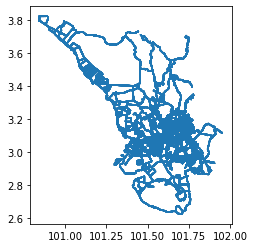

In [36]:
traffic_flow.plot()

In [37]:
print(cugraph.__version__)

0+untagged.1.g892a8e1


In [38]:
traffic_flow.head()

,TMC_PC,TMC_DE,TMC_QD,TMC_LE,FC,CF_SP,CF_SU,CF_FF,CF_JF,CF_CN,PBT,DE,geometry,endpoints,start_point,end_point,road_condition
0,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,-,0.71360,2,70.00,70.00,70.0,0.00000,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74195 3.08229, 101.74197 3.082...","MULTIPOINT (101.74195 3.08229, 101.74658 3.07899)",POINT (101.74195 3.08229),POINT (101.74658 3.07899),0.00000
1,5803,Jalan Cheras Hartamas,-,0.11864,2,70.00,70.00,70.0,0.00000,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74658 3.07899, 101.74688 3.078...","MULTIPOINT (101.74658 3.07899, 101.74763 3.07880)",POINT (101.74658 3.07899),POINT (101.74763 3.07880),0.00000
2,5804,Jalan Medan Masria,-,1.14547,2,85.00,85.00,90.0,0.81481,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74763 3.07880, 101.74779 3.078...","MULTIPOINT (101.74763 3.07880, 101.74830 3.07868)",POINT (101.74763 3.07880),POINT (101.74830 3.07868),0.81481
3,5803,Jalan Cheras Hartamas,+,0.71240,2,71.00,71.00,84.2,2.29928,0.70,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74829 3.07853, 101.74802 3.078...","MULTIPOINT (101.74829 3.07853, 101.74715 3.07869)",POINT (101.74829 3.07853),POINT (101.74715 3.07869),2.29928
4,5802,E37/Lebuhraya Hubungan Timur-Barat/Lebuhraya S...,+,0.82177,2,59.37,59.37,67.6,1.78578,0.71,2020-08-26T21:09:35Z,Lebuhraya Cheras-Kajang/Lebuhraya CKE/Cheras-K...,"LINESTRING (101.74715 3.07869, 101.74685 3.078...","MULTIPOINT (101.74715 3.07869, 101.74182 3.08248)",POINT (101.74715 3.07869),POINT (101.74182 3.08248),1.78578


## Edge DataFrame

In [93]:
edge_arr_distance = []
edge_arr_roadCondition = []
node_dict = {}
node_counter = 0
for row in traffic_flow.iterrows():
    #print(list(zip(row[1]['start_point'].coords.xy)))
    if row[1]['geometry'].geom_type == 'LineString':
        for seg_start, seg_end in zip(list(row[1]['geometry'].coords),list(row[1]['geometry'].coords)[1:]):
            seg_start_gps = (seg_start[1], seg_start[0])
            seg_end_gps = (seg_end[1], seg_end[0])
            
            if node_dict.get(seg_start_gps) is None:
                node_dict[seg_start_gps] = node_counter
                node_counter += 1
                
            if node_dict.get(seg_end_gps) is None:
                node_dict[seg_end_gps] = node_counter
                node_counter += 1
            
            edge_arr_distance.append([node_dict[seg_start_gps], node_dict[seg_end_gps], float(row[1]['TMC_LE'])])
            edge_arr_roadCondition.append([node_dict[seg_start_gps], node_dict[seg_end_gps], float(row[1]['road_condition'])])
            #print(seg_start_gps)
            #kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
            #kl_selangor_graph_distance.add_nodes_from(seg_start_gps)
            #kl_selangor_graph_distance.add_nodes_from(seg_end_gps)
            #kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
            #kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
            #kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
            #graph_nodes.append(Point(seg_start_gps))
            #graph_nodes.append(Point(seg_end_gps))
    elif row[1]['geometry'].geom_type == 'MultiLineString':
        for line_part in row[1]['geometry']:
            for seg_start, seg_end in zip(list(line_part.coords),list(line_part.coords)[1:]):
                seg_start_gps = (seg_start[1], seg_start[0])
                seg_end_gps = (seg_end[1], seg_end[0])
                
                if node_dict.get(seg_start_gps) is None:
                    #print(seg_start_gps)
                    node_dict[seg_start_gps] = node_counter
                    node_counter += 1

                if node_dict.get(seg_end_gps) is None:
                    #print(seg_end_gps)
                    node_dict[seg_end_gps] = node_counter
                    node_counter += 1

                edge_arr_distance.append([node_dict[seg_start_gps], node_dict[seg_end_gps], float(row[1]['TMC_LE'])])
                edge_arr_roadCondition.append([node_dict[seg_start_gps], node_dict[seg_end_gps], float(row[1]['road_condition'])])
                #print(seg_start_gps)
                #kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
                #kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
                #kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
                #kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
               


(3.092916436486379, 101.75280811200614)
(3.0927, 101.7526)
(3.09259, 101.75252)
(3.09248, 101.75247)
(3.09232, 101.75241)
(3.09216, 101.75237)
(3.0920172078063644, 101.75233993848555)
(3.089277114027149, 101.75091333880091)
(3.08927, 101.7509)
(3.08921, 101.7507)
(3.08919, 101.75064)
(3.08911, 101.75033)
(3.08904, 101.75004)
(3.08894, 101.74966)
(3.08887, 101.74935)
(3.08885, 101.74927)
(3.08877, 101.74898)
(3.08872, 101.74877)
(3.19874, 101.70401)
(3.19861, 101.70405)
(3.19842, 101.7041)
(3.19834, 101.70412)
(3.19803, 101.70422)
(3.19734, 101.7044)
(3.19692, 101.7045)
(3.19679, 101.70453)
(3.19655, 101.7046)
(3.19627, 101.70471)
(3.196, 101.70484)
(3.19568, 101.70504)
(3.19547, 101.70516)
(3.1951, 101.70531)
(3.19491, 101.70538)
(3.19477, 101.70542)
(3.19444, 101.70551)
(3.19407, 101.70559)
(3.19395, 101.70561)
(3.19377, 101.70565)
(3.19363, 101.70569)
(3.19342, 101.70573)
(3.19327, 101.70575)
(3.19305, 101.70576)
(3.19278, 101.70572)
(3.19253, 101.70566)
(3.19242, 101.70562)
(3.19228

In [94]:
print(node_dict.get(seg_start_gps))
print(node_dict.get(seg_end_gps))

103029
103030


In [95]:
test = pd.DataFrame(edge_arr_distance)
print(len(test))
test.head()

2447040


,0,1,2
0,0,1,0.7136
1,1,2,0.7136
2,2,3,0.7136
3,3,4,0.7136
4,4,5,0.7136


In [96]:
edge_df_distance = cudf.DataFrame.from_pandas(pd.DataFrame(edge_arr_distance))
edge_df_roadCondition = cudf.DataFrame.from_pandas(pd.DataFrame(edge_arr_roadCondition))

In [97]:
edge_df_distance.tail()

,0,1,2
2447035,103025,103026,0.186
2447036,103026,103027,0.186
2447037,103027,103028,0.186
2447038,103028,103029,0.186
2447039,103029,103030,0.186


## Network Creation

In [98]:
kl_selangor_graph_distance = cugraph.Graph()
kl_selangor_graph_distance.from_cudf_edgelist(edge_df_distance, source=0, destination=1, edge_attr=2)

kl_selangor_graph_roadCondition = cugraph.Graph()
kl_selangor_graph_roadCondition.from_cudf_edgelist(edge_df_roadCondition, source=0, destination=1, edge_attr=2)


In [99]:
origin = (3.01689, 101.37124)
destination = (2.97395, 101.68976)

print(node_dict[origin])
print(node_dict[destination])

43018
44039


In [101]:
distances_distance = cugraph.shortest_path(kl_selangor_graph_distance, 43018)
distances_roadCondition = cugraph.shortest_path(kl_selangor_graph_distance, 43018)

In [102]:
print(kl_selangor_graph_distance.has_node(43018))
print(kl_selangor_graph_distance.has_node(43018))

True
True


In [103]:
distances_distance

,distance,vertex,predecessor
0,1.797693e+308,12897,-1
1,1.797693e+308,12898,-1
2,1.797693e+308,12899,-1
3,1.797693e+308,12900,-1
4,1.797693e+308,12901,-1
...,...,...,...
144311,1.159797e+03,143931,143932
144312,4.746026e+02,93868,93869
144313,4.734605e+02,93869,93870
144314,4.723185e+02,93870,93871


In [105]:
distances_distance[distances_distance['vertex'] == 44039]

,distance,vertex,predecessor
77210,1149.72298,44039,44038


In [106]:
distances_distance[distances_roadCondition['vertex'] == 44039]

,distance,vertex,predecessor
67034,897.87935,27057,27056


In [20]:
kl_selangor_graph = cugraph.Graph()
#geoms =[shape(feature['geometry']) for feature in fiona.open("msia_routes_kl/msia_routes_kl.shp")]
geoms = traffic_flow['geometry']
weights = traffic_flow['road_condition']
import itertools
# create a Graph


kl_selangor_graph_distance = cugraph.Graph()
kl_selangor_graph_roadCondition = cugraph.Graph()
graph_nodes = []

#kl_selangor_graph_distance.

for row in traffic_flow.iterrows():
    #print(list(zip(row[1]['start_point'].coords.xy)))
    if row[1]['geometry'].geom_type == 'LineString':
        for seg_start, seg_end in zip(list(row[1]['geometry'].coords),list(row[1]['geometry'].coords)[1:]):
            seg_start_gps = (seg_start[1], seg_start[0])
            seg_end_gps = (seg_end[1], seg_end[0])
            print(seg_start_gps)
            #kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
            kl_selangor_graph_distance.add_nodes_from(seg_start_gps)
            kl_selangor_graph_distance.add_nodes_from(seg_end_gps)
            kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
            kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
            kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
            #graph_nodes.append(Point(seg_start_gps))
            #graph_nodes.append(Point(seg_end_gps))
    elif row[1]['geometry'].geom_type == 'MultiLineString':
        for line_part in row[1]['geometry']:
            for seg_start, seg_end in zip(list(line_part.coords),list(line_part.coords)[1:]):
                seg_start_gps = (seg_start[1], seg_start[0])
                seg_end_gps = (seg_end[1], seg_end[0])
                #print(seg_start_gps)
                kl_selangor_graph_distance.add_nodes_from([seg_start_gps, seg_end_gps])
                kl_selangor_graph_distance.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['TMC_LE']))
                kl_selangor_graph_roadCondition.add_nodes_from([seg_start_gps, seg_end_gps])
                kl_selangor_graph_roadCondition.add_edge(seg_start_gps, seg_end_gps, weight=float(row[1]['road_condition']))
               
    

(3.08229, 101.74195)


AttributeError: 'Graph' object has no attribute 'add_edge'

In [56]:
print(len(kl_selangor_graph_distance))
print(len(kl_selangor_graph_roadCondition))

144316
144316


In [22]:
kl_selangor_graph_distance.nodes
#list(kl_selangor_graph_distance.nodes)

<bound method Graph.nodes of <cugraph.structure.graph.Graph object at 0x7f45b9582cd0>>

# Saving the network

In [58]:
network_name = "kl_selangor_traffic_flow_26082020_2100_2200"
cugraph.write_gpickle(kl_selangor_graph_distance, 'networks/kl_selangor_traffic_flow_26082020_2100_2200_distance.gpickle')
cugraph.write_gpickle(kl_selangor_graph_roadCondition, 'networks/kl_selangor_traffic_flow_26082020_2100_2200_roadCondition.gpickle')

In [15]:
origin = (3.01689, 101.37124)
destination = (2.97395, 101.68976)
destination = (3.02693, 101.57018)


route1 = cugraph.shortest_path(kl_selangor_graph_distance, origin, destination)
route2 = cugraph.shortest_path(kl_selangor_graph_roadCondition, origin, destination)

route1_arr_lat = []
route1_arr_lon = []

for element in route1:
    route1_arr_lat.append(element[1])
    route1_arr_lon.append(element[0])
    
route2_arr_lat = []
route2_arr_lon = []

for element in route2:
    route2_arr_lat.append(element[1])
    route2_arr_lon.append(element[0])
    
"""
import geopandas as gpd
from shapely.geometry import Polygon
polygon_geom = LineString(zip(route1_arr_lon, route1_arr_lat))
crs = {'init': 'epsg:4326'}
route1_gdf = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
route1_gdf.plot()

import geopandas as gpd
from shapely.geometry import Polygon
polygon_geom = LineString(zip(route2_arr_lon, route2_arr_lat))
crs = {'init': 'epsg:4326'}
route2_gdf = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
route2_gdf.plot()
"""    

NameError: name 'kl_selangor_graph_distance' is not defined

In [44]:
route1_arr_lat

[101.37124,
 101.37124,
 101.37123,
 101.37122,
 101.3712,
 101.37115,
 101.3711,
 101.37102,
 101.37112,
 101.37116,
 101.37119,
 101.37131,
 101.37135,
 101.37137,
 101.37138,
 101.37138,
 101.37137,
 101.37136,
 101.37132,
 101.37126,
 101.37116,
 101.37104,
 101.37092,
 101.37084,
 101.37077,
 101.37069,
 101.37066,
 101.37064,
 101.37067,
 101.37071,
 101.37076,
 101.37083,
 101.3709,
 101.37104,
 101.37117,
 101.37129,
 101.37154,
 101.37203,
 101.37218,
 101.37276,
 101.37296,
 101.3736,
 101.37401,
 101.37427,
 101.37499,
 101.37538,
 101.37574,
 101.37608,
 101.37632,
 101.37623,
 101.37631,
 101.37688,
 101.37799,
 101.37842,
 101.3786,
 101.37904,
 101.3796,
 101.38112,
 101.3823,
 101.38255,
 101.38313,
 101.38368,
 101.38392,
 101.38424,
 101.38492,
 101.38511,
 101.38613,
 101.38652,
 101.38667,
 101.38683,
 101.38733,
 101.38761,
 101.38791,
 101.38812,
 101.38831,
 101.38853,
 101.38873,
 101.38919,
 101.38937,
 101.38955,
 101.3899,
 101.39037,
 101.39094,
 101.39163,


In [45]:
route2_arr_lat 

[101.37124,
 101.37123,
 101.37122,
 101.37118,
 101.37113,
 101.37103,
 101.37092,
 101.37081,
 101.37073,
 101.37065,
 101.37057,
 101.37054,
 101.37053,
 101.37056,
 101.3706,
 101.37065,
 101.37072,
 101.3708,
 101.37082,
 101.37091,
 101.37102,
 101.37121,
 101.37149,
 101.37194,
 101.37258,
 101.37282,
 101.37326,
 101.37335,
 101.37355,
 101.37396,
 101.3742,
 101.37464,
 101.37499,
 101.37533,
 101.37567,
 101.37623,
 101.37631,
 101.37688,
 101.37799,
 101.37842,
 101.3786,
 101.37904,
 101.3796,
 101.38112,
 101.3823,
 101.38255,
 101.38313,
 101.38368,
 101.38392,
 101.38424,
 101.38492,
 101.38511,
 101.38613,
 101.38652,
 101.38667,
 101.38683,
 101.38733,
 101.38768,
 101.38796,
 101.38819,
 101.38837,
 101.38841,
 101.38888,
 101.38937,
 101.38962,
 101.39061,
 101.39094,
 101.39114,
 101.39125,
 101.39146,
 101.39164,
 101.39175,
 101.39184,
 101.3919,
 101.39196,
 101.39196,
 101.39192,
 101.39183,
 101.39166,
 101.39153,
 101.39129,
 101.39122,
 101.39119,
 101.39119,

In [64]:
kl_selangor_map = folium.Map(location=[3.027020, 101.570559], zoom_start= 10)
folium.PolyLine(route1, color="blue", weight=10, opacity=1).add_to(kl_selangor_map)
folium.PolyLine(route2, color="red", weight=5, opacity=0.5).add_to(kl_selangor_map)
kl_selangor_map


In [ ]:
print(len(G))

In [31]:
(3.027020, 101.570559) in list(kl_selangor_graph_distance.nodes)

False

# Using the network created

In [20]:
from shapely.geometry import Point, MultiPoint
home = Point(3.027020, 101.570559)
#print(home)
graph_nodes = []
for element in kl_selangor_graph_distance.nodes:
    #print(element)
    graph_nodes.append(Point(element))
#nearest = nearest_points(home, graph_nodes)
[o.wkt for o in nearest_points(home, MultiPoint(graph_nodes))]
#nearest = nearest_points(home, list(kl_selangor_graph_distance.nodes))

['POINT (3.02702 101.570559)', 'POINT (3.02693 101.57018)']